In [1]:
from __future__ import division
import time

import numpy as np
from sklearn import preprocessing

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

In [15]:
X = [i for i in range(1000)]
X = np.array(X).reshape(-1,1)
X.size

1000

In [16]:
y = np.genfromtxt("binaries/y.np")
y=y[0:1000]
y.size

1000

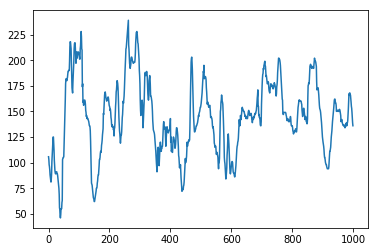

In [26]:

plt.plot(X,y)


In [28]:
X_plot = np.linspace(0, 5, 100000)[:, None]
X_plot

array([[0.00000e+00],
       [5.00005e-05],
       [1.00001e-04],
       ...,
       [4.99990e+00],
       [4.99995e+00],
       [5.00000e+00]])

In [29]:
# Fit regression model
train_size = 1000
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})


In [30]:
t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

SVR complexity and bandwidth selected and model fitted in 26.099 s


In [31]:
sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

Support vector ratio: 0.974
